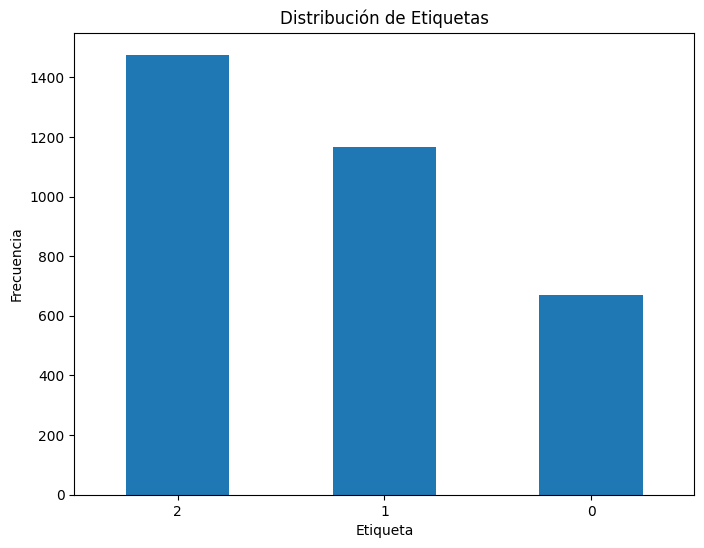

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos2.csv", header=None)

# Obtener las etiquetas (última columna del DataFrame)
labels = df.iloc[:, -1]

# Contar la frecuencia de cada etiqueta
label_counts = labels.value_counts()

# Graficar la distribución de las etiquetas
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos2.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Declarar lr y momentum
lr = 0.001
momentum = 0.9

# Definir el número de características y clases
num_features = X.shape[1]
num_classes = len(np.unique(y))

# Construir y compilar el modelo
entrada = tf.keras.Input(shape=(num_features,))
salida = tf.keras.layers.Dense(num_classes,activation="softmax")(entrada)
model= tf.keras.Model(inputs = entrada,outputs = salida)
#model = tf.keras.Model([
#    tf.keras.layers.Dense(num_classes, activation= 'sigmoid', input_shape=(num_features,))
#])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Validación cruzada
num_folds = 20

kf = KFold(n_splits=num_folds)

fold_accs = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en este fold
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Evaluar el modelo en este fold
    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_accs.append(fold_acc)

# Calcular la precisión promedio
mean_acc = np.mean(fold_accs)

print('Precisión promedio en validación cruzada:', mean_acc)

# Precisión promedio en validación cruzada: 0.5354545475915075    -> softmax

Precisión promedio en validación cruzada: 0.5435651699081063


In [ ]:
def primera_capa(): 
    num_features = X.shape[1]
    for epocas in range(20, 120, 20):
        for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.5
                while j < 1:

                    #model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                    entrada = tf.keras.Input(shape=(num_features,))
                    salida = tf.keras.layers.Dense(c,activation="softmax")(entrada)
                    model= tf.keras.Model(inputs = entrada,outputs = salida)



                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 20

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_primera.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.5
                i += 0.2
            c = c+ 1

    #Este pertenece a la primera capa, pero aun falta modificarlo para la segunda

In [ ]:
def segunda_capa():
    num_features = X.shape[1]
    for epocas in range(20, 120, 20):
        for c in range (3,16):
            i = 0.2
            while i < 1:
                j = 0.5
                while j < 1:

                    #model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                    #entrada = tf.keras.Input(shape=(num_features,))
                    #salida = tf.keras.layers.Dense(c,activation="softmax")(entrada)
                    #model= tf.keras.Model(inputs = entrada,outputs = salida)

                    entrada = tf.keras.Input(shape=(num_features,))
                    oculta = tf.keras.layers.Dense(c, activation='softmax')(entrada)
                    salida = tf.keras.layers.Dense(c, activation='softmax')(oculta)
                    model = tf.keras.Model(inputs=entrada, outputs=salida)

                    optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                    num_folds = 20

                    kf = KFold(n_splits=num_folds)

                    fold_accs = []

                    for train_index, val_index in kf.split(X):
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]


                        model.fit(X_train, y_train, epochs=epocas, verbose=0)
                        _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                        fold_accs.append(fold_acc)
                    mean_acc = np.mean(fold_accs)
                    with open("resultados_model_segunda.csv", "a") as file:
                        file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                    print(epocas,c,i, j)

                    j += 0.5
                i += 0.2
            c = c+ 1

#Este pertenece a la primera capa, pero aun falta modificarlo para la segunda